In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np

In [6]:
Updated = pd.read_csv('/content/Updated.csv')
updated_1095 = pd.read_csv('/content/updated_1095.csv')


In [7]:
data = pd.concat([Updated , updated_1095], ignore_index=True)

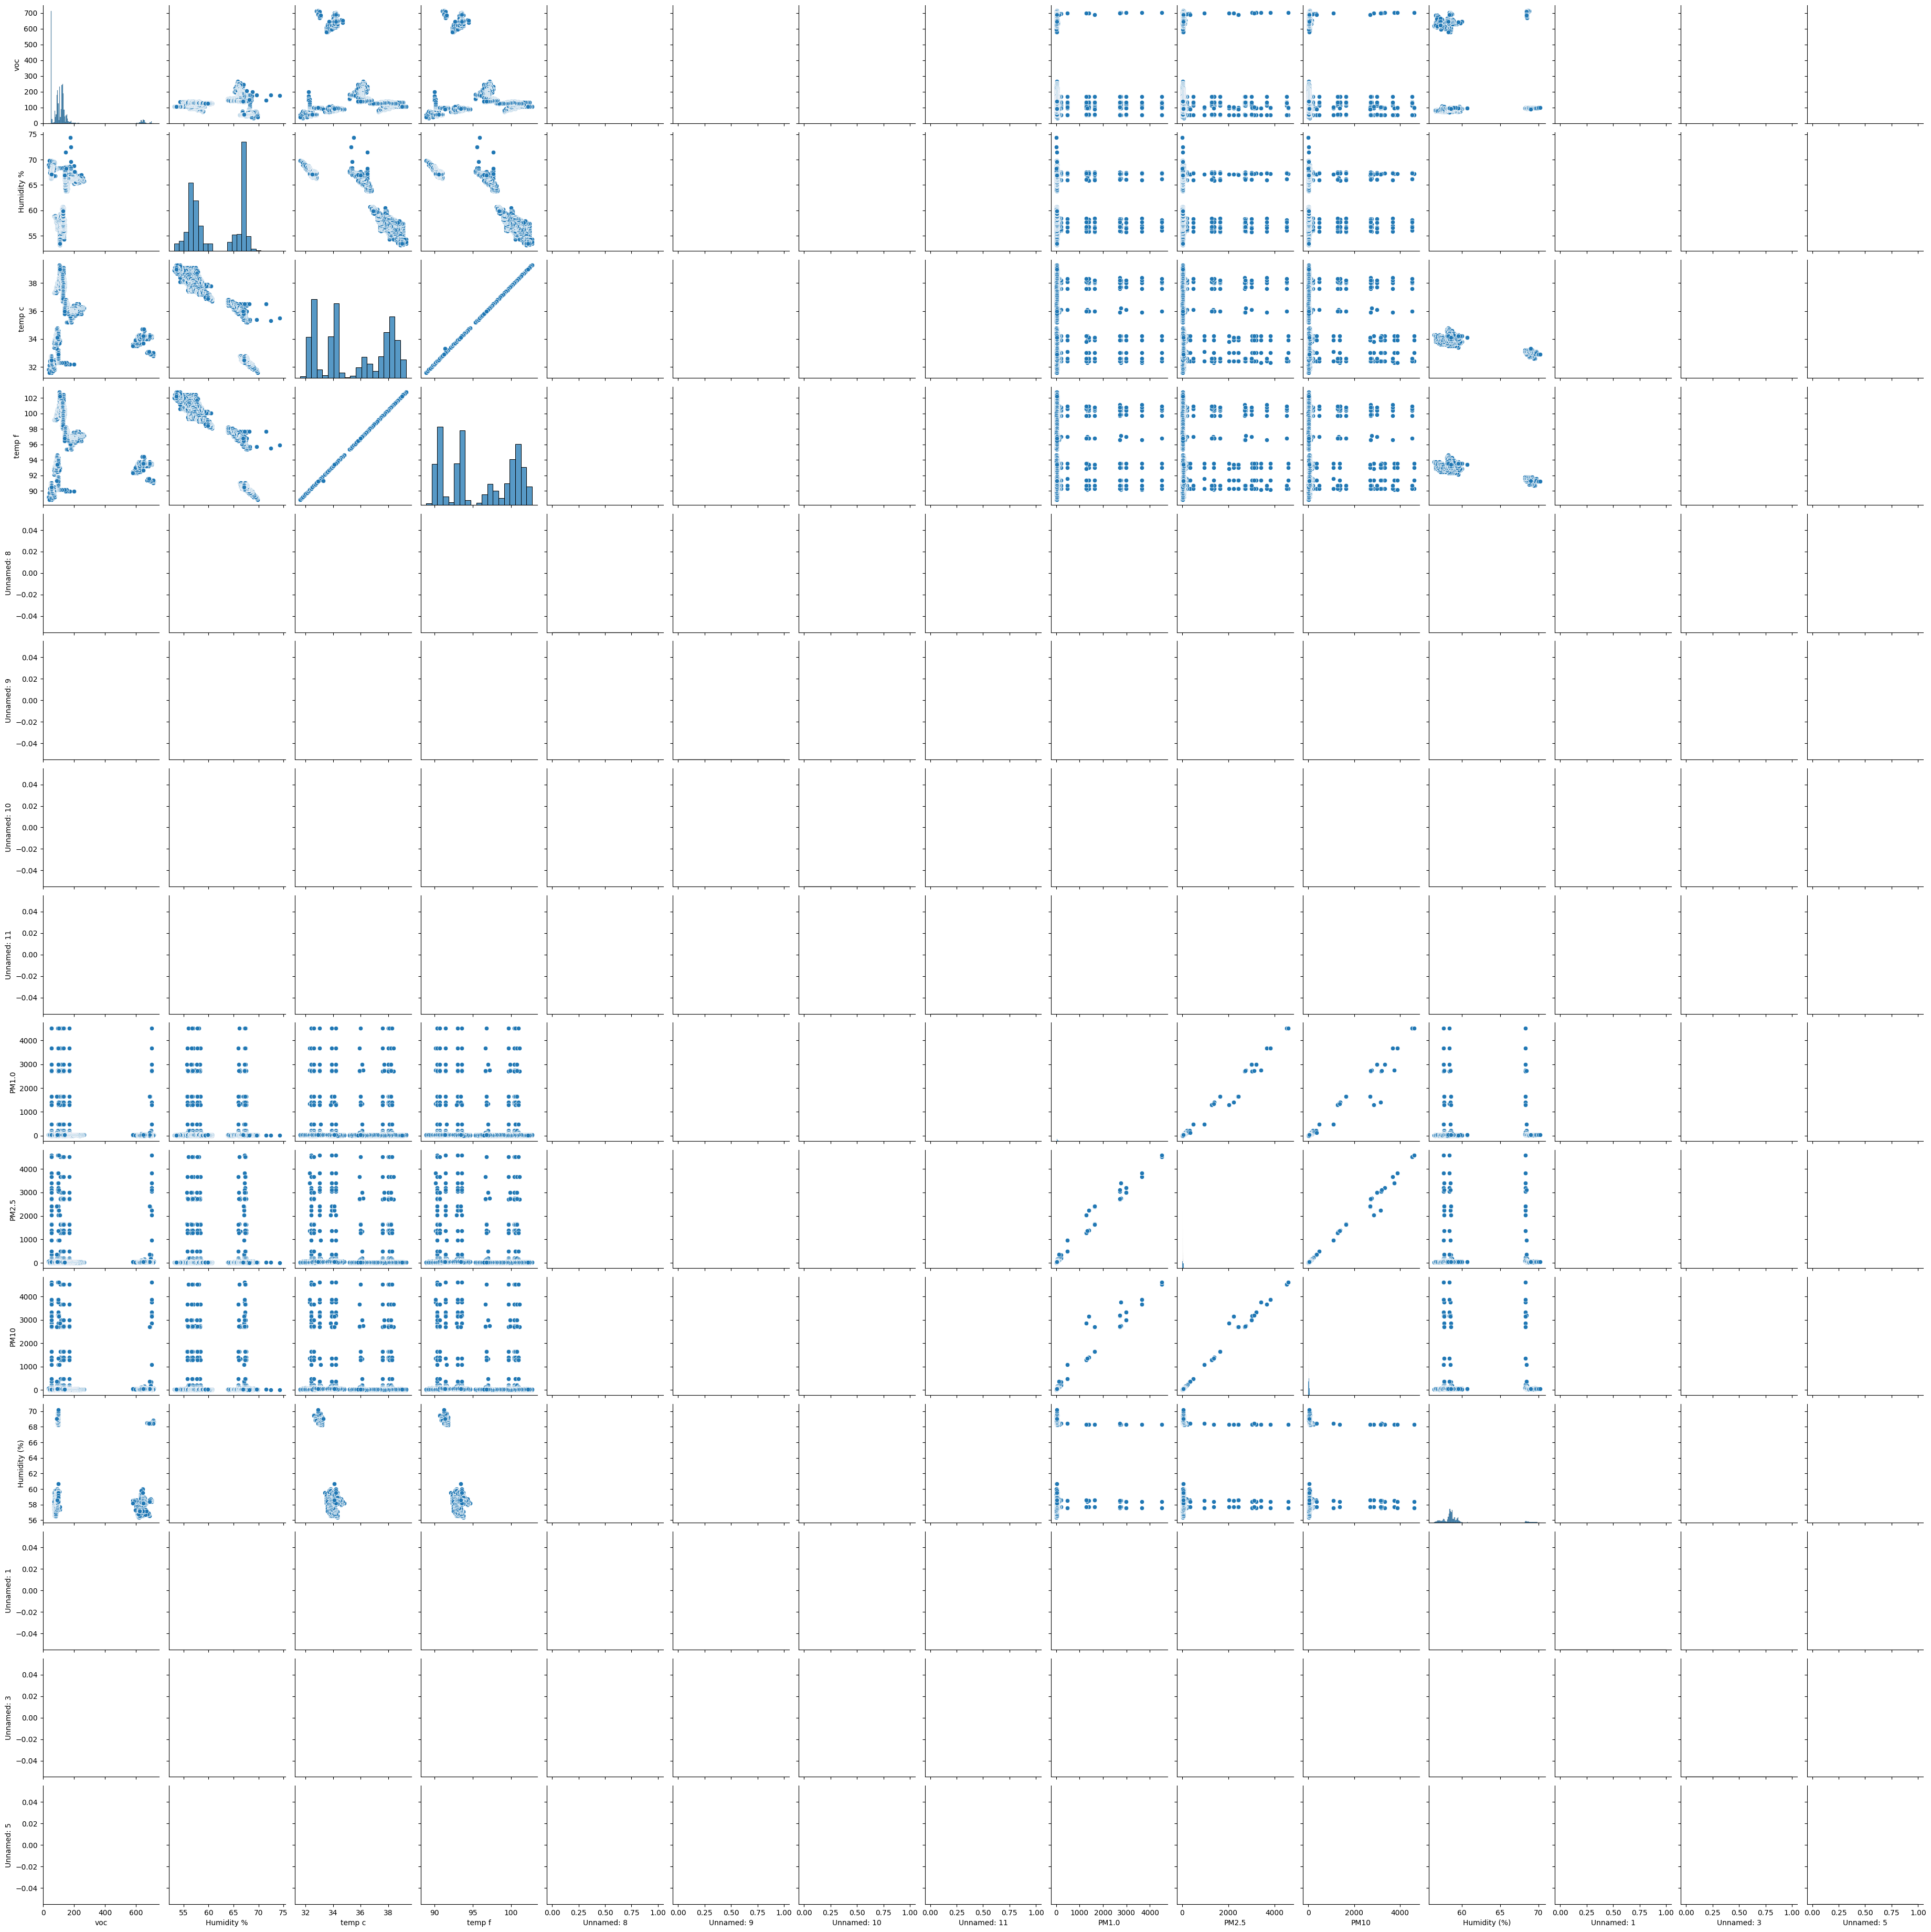

In [8]:
sns.pairplot(data)
plt.show()

In [46]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].astype('int64') / 10**9


In [47]:
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [48]:
X = data.drop(columns=['co2-analog', 'voc', 'PM2.5', 'temp c', 'Humidity %'])
y_co2 = data['co2-analog']
y_voc = data['voc']
y_pm25 = data['PM2.5']
y_temp = data['temp c']
y_humidity = data['Humidity %']

In [49]:
X_train, X_test, y_co2_train, y_co2_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)
X_train, X_test, y_voc_train, y_voc_test = train_test_split(X, y_voc, test_size=0.2, random_state=42)
X_train, X_test, y_pm25_train, y_pm25_test = train_test_split(X, y_pm25, test_size=0.2, random_state=42)
X_train, X_test, y_temp_train, y_temp_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train, X_test, y_humidity_train, y_humidity_test = train_test_split(X, y_humidity, test_size=0.2, random_state=42)


In [50]:
model_co2 = LinearRegression()
model_voc = LinearRegression()
model_pm25 = LinearRegression()
model_temp = LinearRegression()
model_humidity = LinearRegression()

In [51]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        try:
            # Attempt to convert the column to numeric
            X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
            X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
        except ValueError:
            print(f"Could not convert column {col} to numeric.")

In [52]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [53]:
y_co2_train = pd.to_numeric(y_co2_train, errors='coerce')

if y_co2_train.isnull().any():
    print("Warning: y_co2_train contains NaN values. Filling with mean.")
    y_co2_train = y_co2_train.fillna(y_co2_train.mean())

In [54]:
y_voc_train = pd.to_numeric(y_voc_train, errors='coerce')

if y_voc_train.isnull().any():
    print("Warning: y_voc_train contains NaN values. Filling with mean.")
    y_voc_train = y_voc_train.fillna(y_voc_train.mean())

In [55]:
y_pm25_train = pd.to_numeric(y_pm25_train, errors='coerce')
if y_pm25_train.isnull().any():
    print("Warning: y_pm25_train contains NaN values. Filling with mean.")
    y_pm25_train = y_pm25_train.fillna(y_pm25_train.mean())

In [56]:
y_temp_train = pd.to_numeric(y_temp_train, errors='coerce')

if y_temp_train.isnull().any():
    print("Warning: y_temp_train contains NaN values. Filling with mean.")
    y_temp_train = y_temp_train.fillna(y_temp_train.mean())

In [57]:
y_humidity_train = pd.to_numeric(y_humidity_train, errors='coerce')

if y_humidity_train.isnull().any():
    print("Warning: y_humidity_train contains NaN values. Filling with mean.")
    y_humidity_train = y_humidity_train.fillna(y_humidity_train.mean())

In [58]:
model_co2.fit(X_train, y_co2_train)
model_voc.fit(X_train, y_voc_train)
model_pm25.fit(X_train, y_pm25_train)
model_temp.fit(X_train, y_temp_train)
model_humidity.fit(X_train, y_humidity_train)

LinearRegression()

In [59]:
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_test_imputed = imputer.fit_transform(X_test)

In [60]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [61]:
y_co2_pred = model_co2.predict(X_test)
y_voc_pred = model_voc.predict(X_test)
y_pm25_pred = model_pm25.predict(X_test)
y_temp_pred = model_temp.predict(X_test)
y_humidity_pred = model_humidity.predict(X_test)

In [62]:
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    bins = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), num=10)
    y_test_binned = np.digitize(y_test, bins)
    y_pred_binned = np.digitize(y_pred, bins)

    accuracy = accuracy_score(y_test_binned, y_pred_binned)
    f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

    return r2, mse, mae, rmse, accuracy, f1

In [65]:
imputer = SimpleImputer(strategy='mean')
y_co2_test = imputer.fit_transform(y_co2_test.values.reshape(-1, 1)).ravel()  # Use .values to get a NumPy array representation of the Series
y_voc_test = imputer.fit_transform(y_voc_test.values.reshape(-1, 1)).ravel()
y_pm25_test = imputer.fit_transform(y_pm25_test.values.reshape(-1, 1)).ravel()
y_temp_test = imputer.fit_transform(y_temp_test.values.reshape(-1, 1)).ravel()
y_humidity_test = imputer.fit_transform(y_humidity_test.values.reshape(-1, 1)).ravel()

In [66]:
# Evaluate the models
print('CO2 Model:')
r2, mse, mae, rmse, accuracy, f1 = evaluate_model(y_co2_test, y_co2_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

print('\nVOC Model:')
r2, mse, mae, rmse, accuracy, f1 = evaluate_model(y_voc_test, y_voc_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

print('\nPM2.5 Model:')
r2, mse, mae, rmse, accuracy, f1 = evaluate_model(y_pm25_test, y_pm25_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

print('\nTemperature Model:')
r2, mse, mae, rmse, accuracy, f1 = evaluate_model(y_temp_test, y_temp_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

print('\nHumidity Model:')
r2, mse, mae, rmse, accuracy, f1 = evaluate_model(y_humidity_test, y_humidity_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CO2 Model:
R2 Score: 0.43716080693237147
Mean Squared Error: 3349.8835869179297
Mean Absolute Error: 41.49107255900782
Root Mean Squared Error: 57.878178849355045
Accuracy: 0.5319069069069069
F1 Score: 0.5682329599744823

VOC Model:
R2 Score: 0.06589695176559318
Mean Squared Error: 17593.06603325535
Mean Absolute Error: 66.60536882207157
Root Mean Squared Error: 132.6388556692772
Accuracy: 0.6137387387387387
F1 Score: 0.6469209196285569

PM2.5 Model:
R2 Score: 0.9991243040542777
Mean Squared Error: 49.79045588349803
Mean Absolute Error: 2.3668509840693783
Root Mean Squared Error: 7.05623524859383
Accuracy: 0.9992492492492493
F1 Score: 0.9993243243243243

Temperature Model:
R2 Score: 0.9999999911479781
Mean Squared Error: 5.0903131066946104e-08
Mean Absolute Error: 8.612381839906107e-05
Root Mean Squared Error: 0.00022561722245197972
Accuracy: 0.9992492492492493
F1 Score: 0.9988748722126382

Humidity Model:
R2 Score: 0.8484601106096692
Mean Squared Error: 2.877665022129912
Mean Absolute

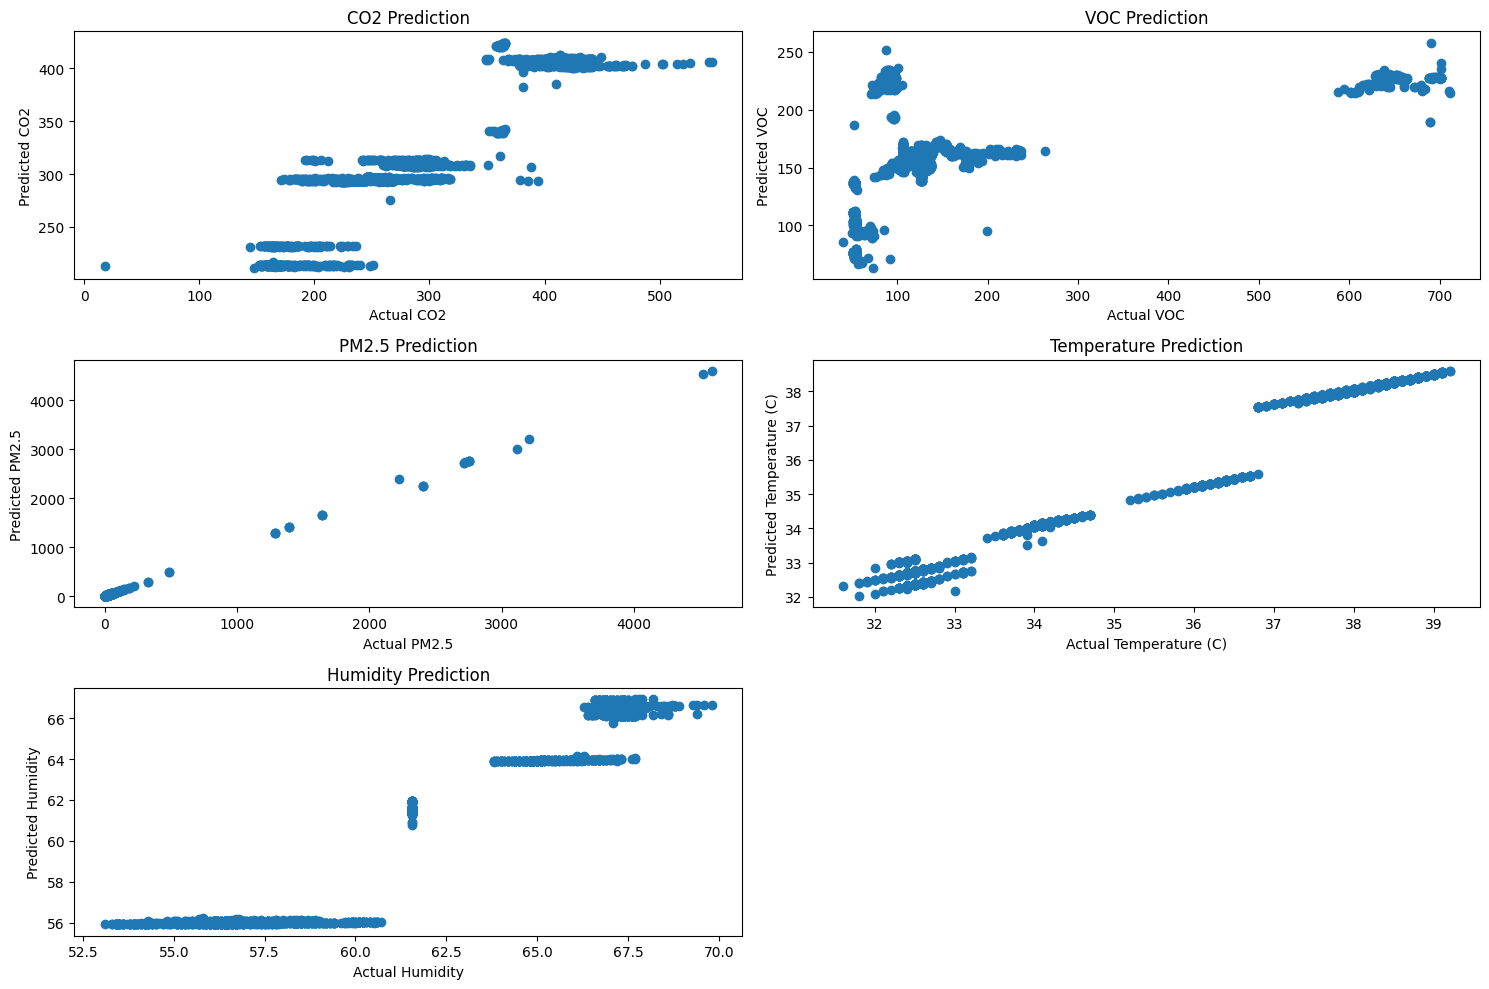

In [27]:
# Visualization of Predictions scatter plot
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.scatter(y_co2_test.astype(float), y_co2_pred.astype(float)) # Convert to float
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title('CO2 Prediction')

plt.subplot(3, 2, 2)
plt.scatter(y_voc_test.astype(float), y_voc_pred.astype(float)) # Convert to float
plt.xlabel('Actual VOC')
plt.ylabel('Predicted VOC')
plt.title('VOC Prediction')

plt.subplot(3, 2, 3)
plt.scatter(y_pm25_test.astype(float), y_pm25_pred.astype(float)) # Convert to float
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('PM2.5 Prediction')

plt.subplot(3, 2, 4)
plt.scatter(y_temp_test.astype(float), y_temp_pred.astype(float)) # Convert to float
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Temperature Prediction')

plt.subplot(3, 2, 5)
plt.scatter(y_humidity_test.astype(float), y_humidity_pred.astype(float)) # Convert to float
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('Humidity Prediction')

plt.tight_layout()
plt.show()

<ipython-input-28-8ca9d6d93e79>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 2)


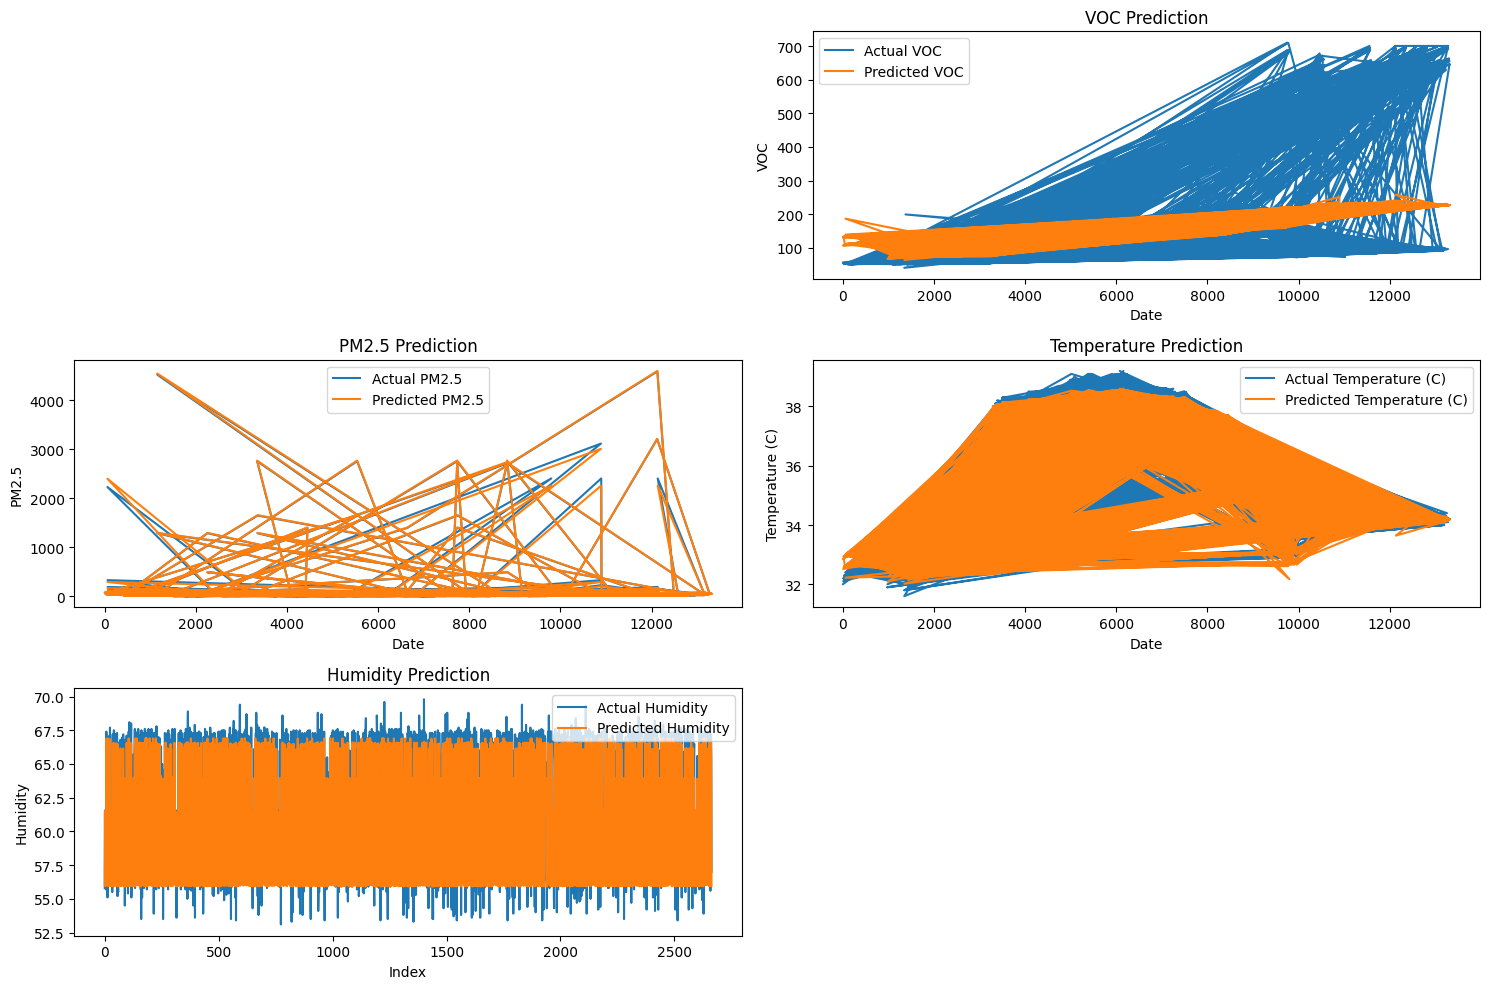

In [28]:
# Visualization of Predictions using Line Plots
plt.figure(figsize=(15, 10))

plt.plot(y_co2_test.index, y_co2_test.astype(float), label='Actual CO2')
plt.plot(y_co2_test.index, y_co2_pred.astype(float), label='Predicted CO2')
plt.xlabel('Date')
plt.ylabel('CO2')
plt.title('CO2 Prediction')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(y_voc_test.index, y_voc_test.astype(float), label='Actual VOC')
plt.plot(y_voc_test.index, y_voc_pred.astype(float), label='Predicted VOC')
plt.xlabel('Date')
plt.ylabel('VOC')
plt.title('VOC Prediction')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(y_pm25_test.index, y_pm25_test.astype(float), label='Actual PM2.5')
plt.plot(y_pm25_test.index, y_pm25_pred.astype(float), label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 Prediction')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(y_temp_test.index, y_temp_test.astype(float), label='Actual Temperature (C)')
plt.plot(y_temp_test.index, y_temp_pred.astype(float), label='Predicted Temperature (C)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Prediction')
plt.legend()

plt.subplot(3, 2, 5)
x_axis = range(len(y_humidity_test))
plt.plot(x_axis, y_humidity_test.astype(float), label='Actual Humidity')
plt.plot(x_axis, y_humidity_pred.astype(float), label='Predicted Humidity')
plt.xlabel('Index')  # Changed label to 'Index'
plt.ylabel('Humidity')
plt.title('Humidity Prediction')
plt.legend()

plt.tight_layout()
plt.show()


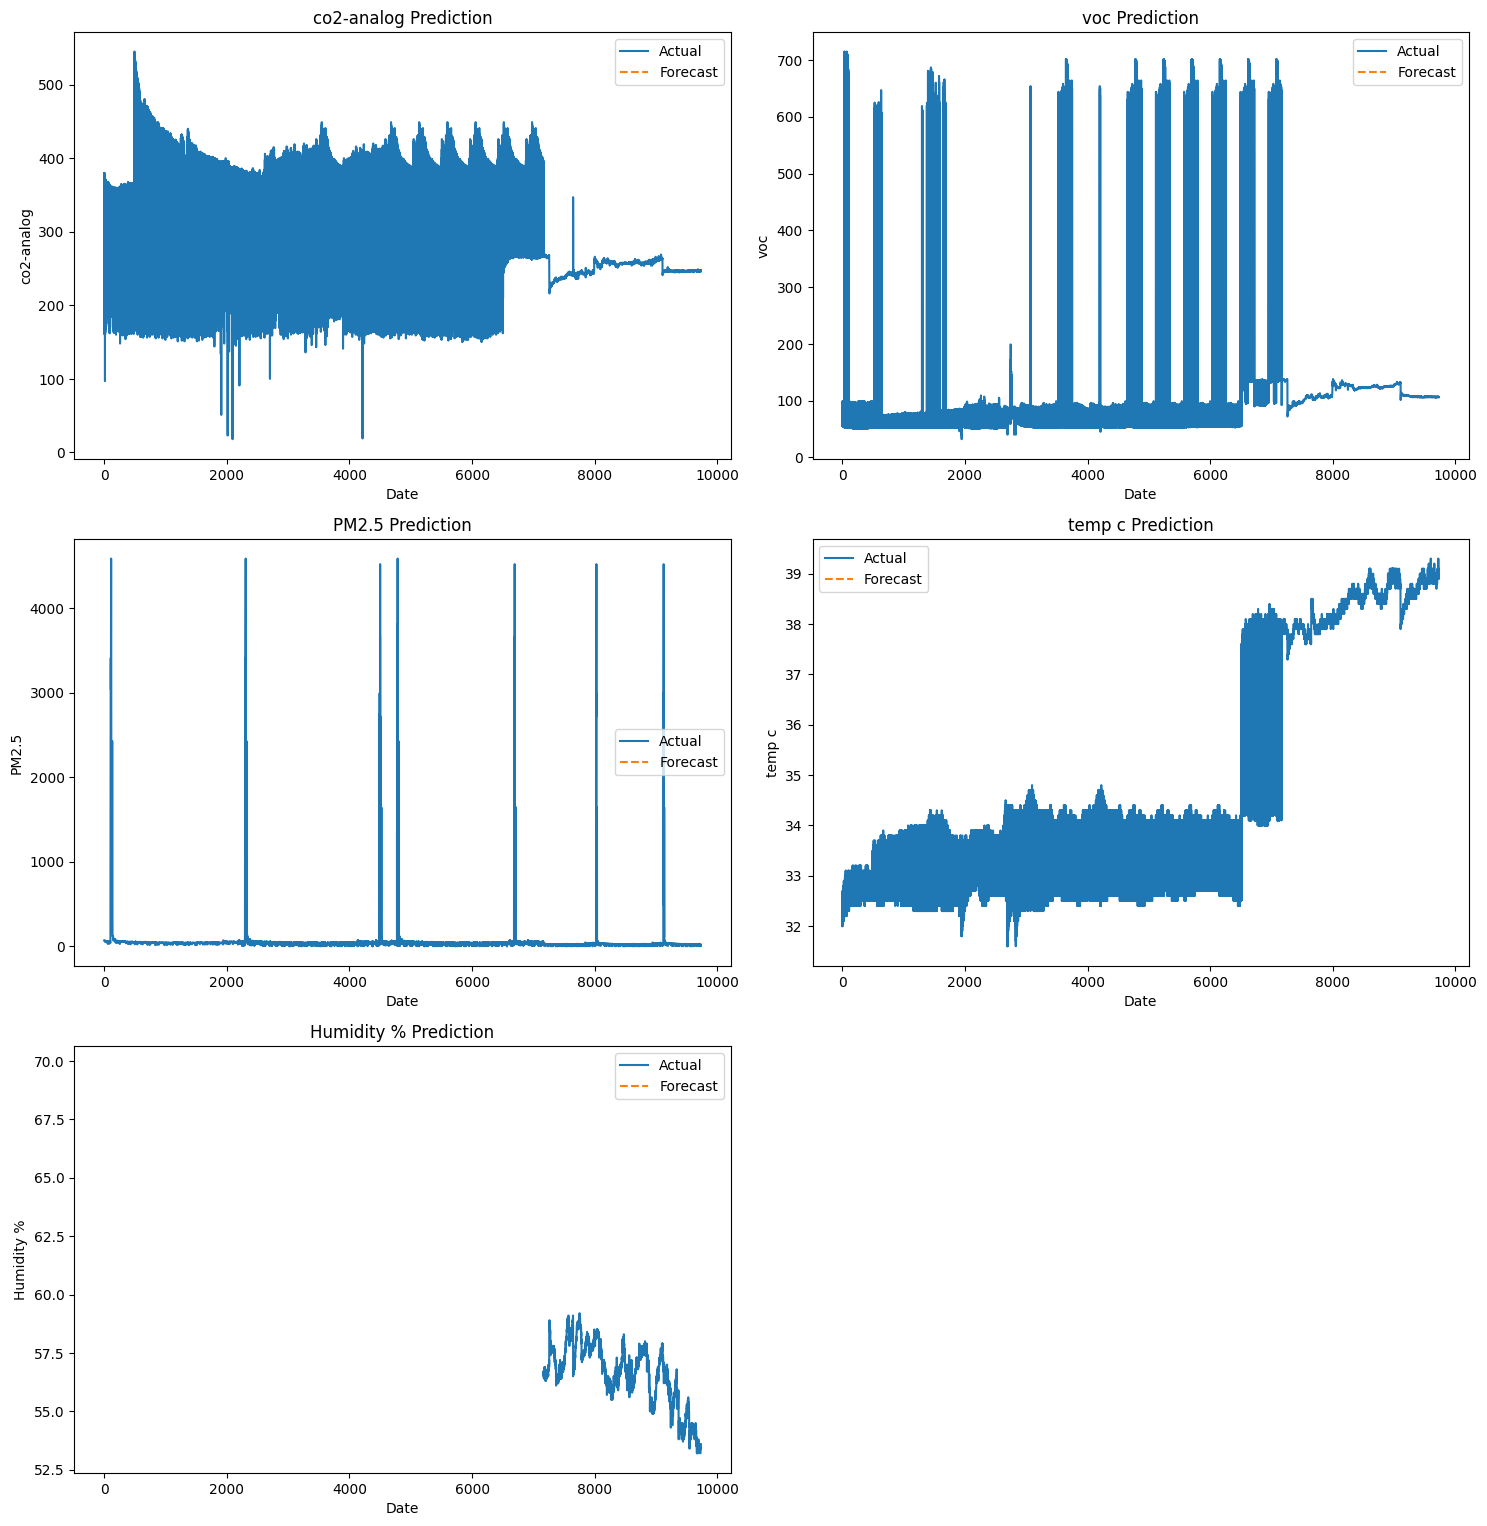

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your data
data = pd.concat([pd.read_csv('Updated.csv'), pd.read_csv('updated_1095.csv')])
# data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)

# List of target variables
target_variables = ['co2-analog', 'voc', 'PM2.5', 'temp c', 'Humidity %']

# Dictionary to store the results
results = {}

# Loop through each target variable to fit ARIMA models
for target in target_variables:
    # Fit the ARIMA model
        data[target] = pd.to_numeric(data[target], errors='coerce')
        data_cleaned = data[target].dropna()


        original_index = data_cleaned.index
        data_cleaned = data_cleaned.reset_index(drop=True) # Reset index after dropping NA



        model = sm.tsa.ARIMA(data_cleaned, order=(1, 1, 1))
        model_fit = model.fit()

    # Forecast the values
        forecast = model_fit.forecast(steps=len(data_cleaned))
    # Store the results
        results[target] = {
          'model_fit': model_fit,
          'forecast': forecast,
          'original_index': original_index # Store the original index for each target

    }

# Visualization of Predictions vs Actuals
plt.figure(figsize=(15, 20))

for i, target in enumerate(target_variables, 1):
    plt.subplot(4, 2, i)


    original_index = results[target]['original_index'] # Retrieve original index
    forecast_aligned = pd.Series(results[target]['forecast'], index=range(len(original_index))) # Align forecast to cleaned data index

    # Use the cleaned data for plotting
    plt.plot(original_index[:len(data_cleaned)], data.loc[original_index, target][:len(data_cleaned)], label='Actual')
    plt.plot(original_index[:len(data_cleaned)], forecast_aligned.values[:len(data_cleaned)], label='Forecast', linestyle='--')

    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} Prediction')
    plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Metrics for co2-analog:
  arima - Precision: 0.33, Recall: 1.00, F1 Score: 0.49
  ets - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  prophet - Precision: 0.13, Recall: 0.00, F1 Score: 0.01
Metrics for voc:
  arima - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  ets - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  prophet - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Metrics for PM2.5:
  arima - Precision: 0.05, Recall: 1.00, F1 Score: 0.10
  ets - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  prophet - Precision: 0.05, Recall: 0.96, F1 Score: 0.10
Metrics for temp c:
  arima - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  ets - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  prophet - Precision: 0.48, Recall: 1.00, F1 Score: 0.65
Metrics for Humidity %:
  arima - Precision: 0.46, Recall: 1.00, F1 Score: 0.63
  ets - Precision: 0.00, Recall: 0.00, F1 Score: 0.00
  prophet - Precision: 0.00, Recall: 0.00, F1 Score: 0.00


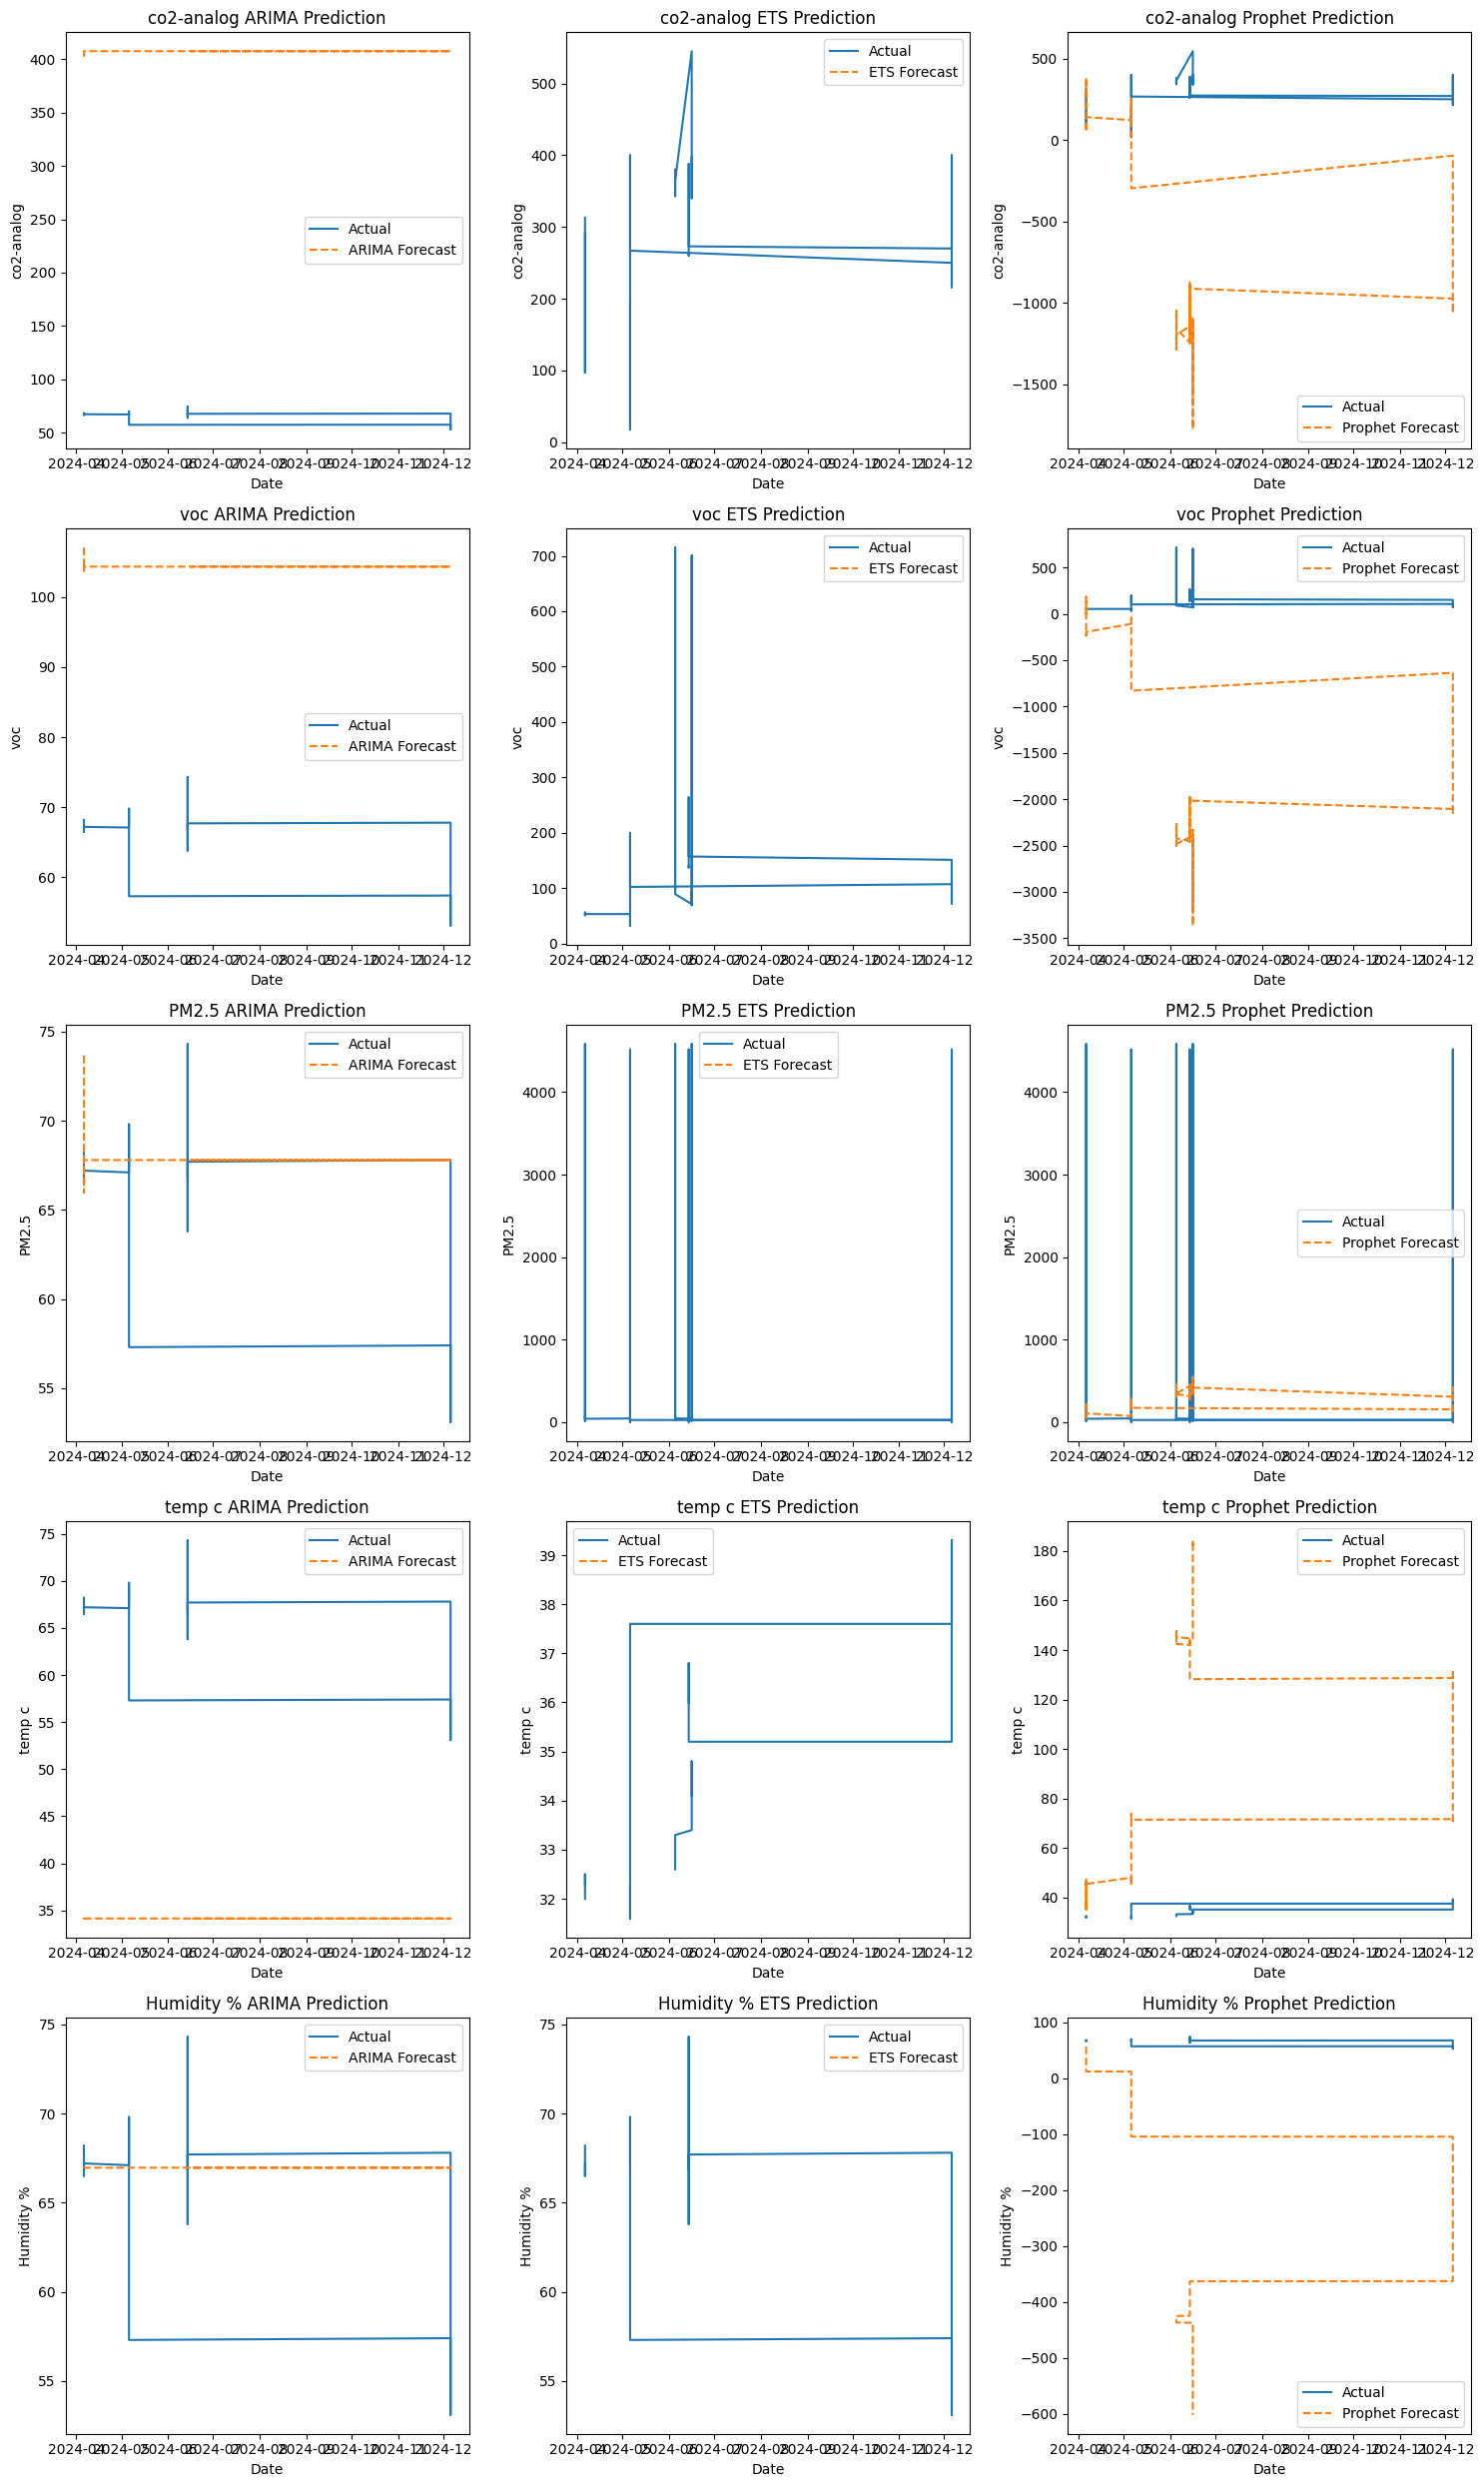

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your data
data = pd.concat([pd.read_csv('Updated.csv'), pd.read_csv('updated_1095.csv')])

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Handle potential errors in date format
    data.set_index('date', inplace=True)
else:
    print("Warning: 'date' column not found in the data. Prophet might not work correctly.")

# List of target variables
target_variables = ['co2-analog', 'voc', 'PM2.5', 'temp c', 'Humidity %']

# Dictionary to store the results
results = {}
metrics = {}

# Loop through each target variable to fit ARIMA and ETS models
for target in target_variables:
    # Fit the ARIMA model
    data[target] = pd.to_numeric(data[target], errors='coerce')
    data_cleaned = data[target].dropna()

    model_arima = sm.tsa.ARIMA(data_cleaned, order=(1, 1, 1))  # Use cleaned data
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=len(data_cleaned))
    # Fit the ETS model
    model_ets = ExponentialSmoothing(data[target], seasonal='add', seasonal_periods=12)
    model_ets_fit = model_ets.fit()
    forecast_ets = model_ets_fit.forecast(steps=len(data))

    # Prepare data for Prophet
    df = data[[target]].reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
    df.dropna(subset=['ds'], inplace=True)

    # Fit the Prophet model
    model_prophet = Prophet()
    model_prophet.fit(df)
    future = model_prophet.make_future_dataframe(periods=len(data), freq='D')
    forecast_prophet = model_prophet.predict(future)
    forecast_prophet = forecast_prophet['yhat'][-len(data):].values

    # Store the results
    results[target] = {
        'arima': forecast_arima,
        'ets': forecast_ets,
        'prophet': forecast_prophet,
        'cleaned_index': data_cleaned.index
    }

    # Calculate Precision, Recall, and F1 Score
    threshold = data[target].mean()  # Example threshold: mean of the actual data
    actuals = data_cleaned.values

    def classify(values, threshold):
        return [1 if value > threshold else 0 for value in values]

    arima_pred = classify(forecast_arima, threshold)
    ets_pred = classify(forecast_ets[:len(data_cleaned)], threshold) # Change is here
    prophet_pred = classify(forecast_prophet[:len(data_cleaned)], threshold) # Slice prophet_pred to match length of actuals_classified
    actuals_classified = classify(actuals, threshold)

    metrics[target] = {
        'arima': {
            'precision': precision_score(actuals_classified, arima_pred),
            'recall': recall_score(actuals_classified, arima_pred),
            'f1_score': f1_score(actuals_classified, arima_pred)
        },
        'ets': {
            'precision': precision_score(actuals_classified, ets_pred),
            'recall': recall_score(actuals_classified, ets_pred),
            'f1_score': f1_score(actuals_classified, ets_pred)
        },
        'prophet': {
            'precision': precision_score(actuals_classified, prophet_pred),
            'recall': recall_score(actuals_classified, prophet_pred),
            'f1_score': f1_score(actuals_classified, prophet_pred)
        }
    }

# Print the metrics
for target in metrics:
    print(f"Metrics for {target}:")
    for model in metrics[target]:
        print(f"  {model} - Precision: {metrics[target][model]['precision']:.2f}, Recall: {metrics[target][model]['recall']:.2f}, F1 Score: {metrics[target][model]['f1_score']:.2f}")

# Visualization of Predictions vs Actuals
plt.figure(figsize=(15, 25))

for i, target in enumerate(target_variables, 1):
    plt.subplot(5, 3, i * 3 - 2)
    plt.plot(data_cleaned.index, data_cleaned, label='Actual')
    plt.plot(results[target]['cleaned_index'], results[target]['arima'], label='ARIMA Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} ARIMA Prediction')
    plt.legend()

    plt.subplot(5, 3, i * 3 - 1)
    plt.plot(data.index, data[target], label='Actual')
    plt.plot(data.index, results[target]['ets'], label='ETS Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} ETS Prediction')
    plt.legend()

    plt.subplot(5, 3, i * 3)
    plt.plot(data.index, data[target], label='Actual')
    plt.plot(data.index, results[target]['prophet'], label='Prophet Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} Prophet Prediction')
    plt.legend()

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Random Forest - co2-analog - Precision: 1.0, Recall: 1.0, F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Random Forest - voc - Precision: 0.24483665039429214, Recall: 1.0, F1 Score: 0.39336349924585223


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Random Forest - PM2.5 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Random Forest - temp c - Precision: 0.0, Recall: 0.0, F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Random Forest - Humidity % - Precision: 1.0, Recall: 0.9992012779552716, F1 Score: 0.9996004794246904


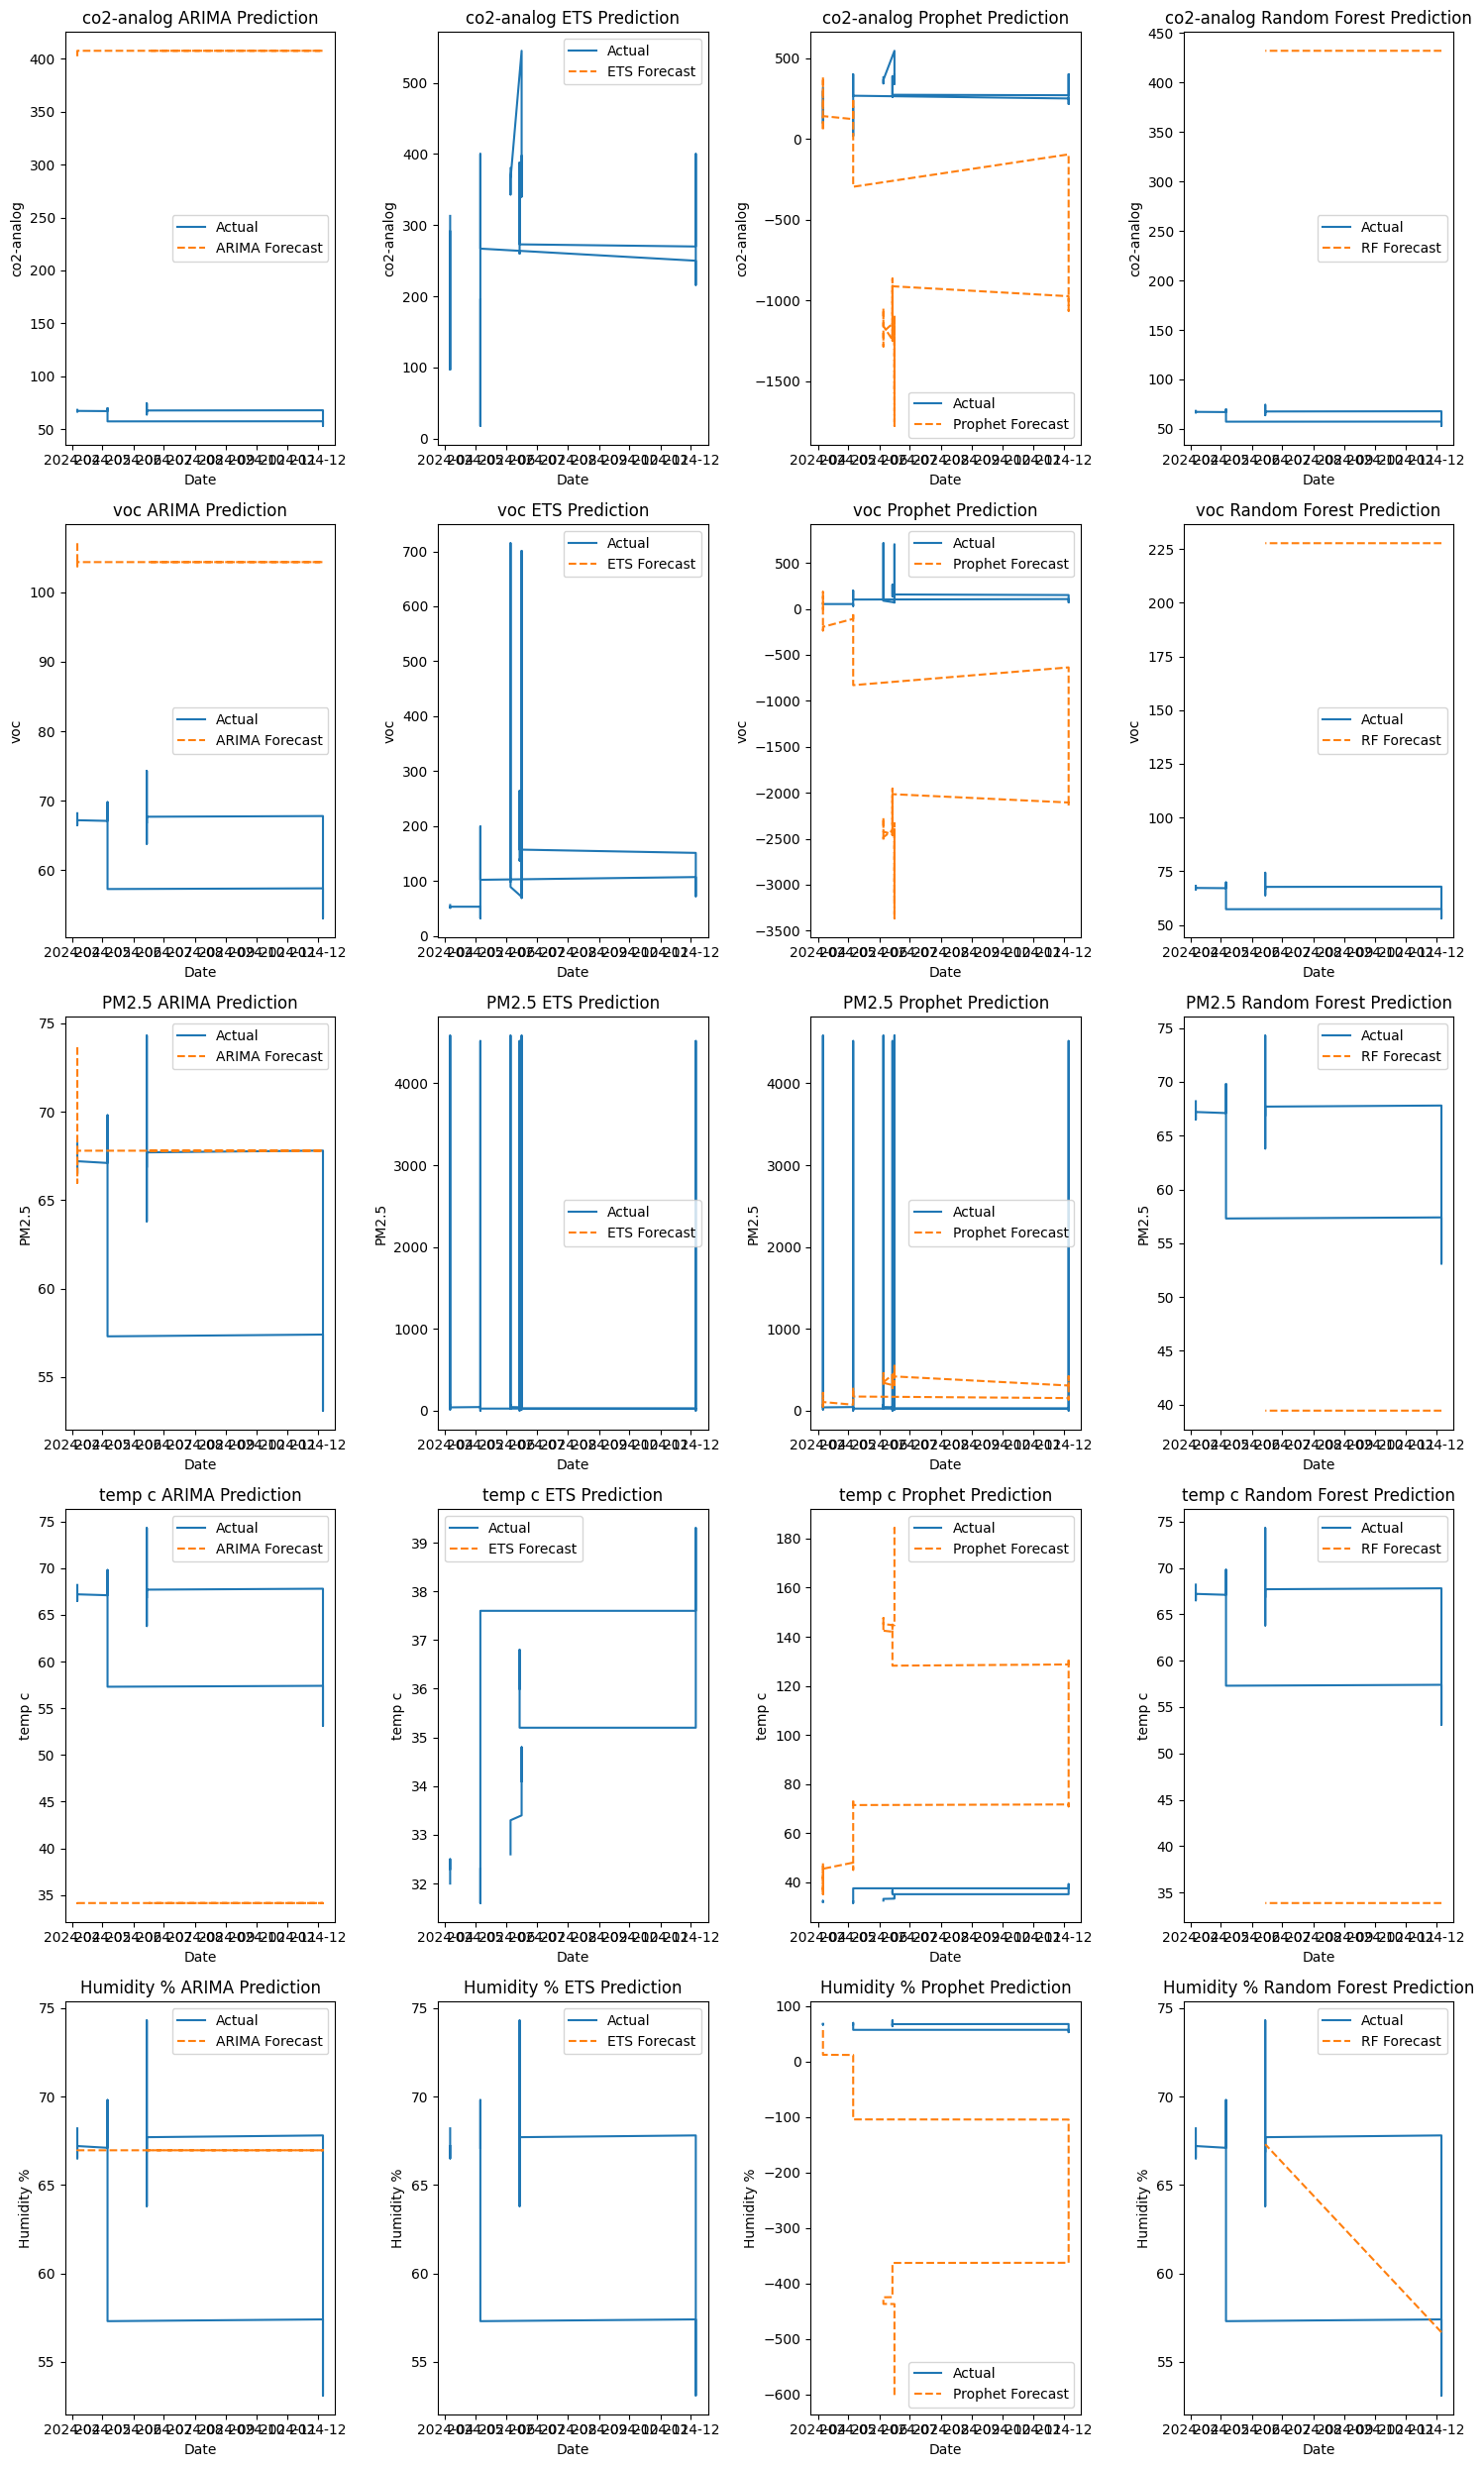

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load your data
data = pd.concat([pd.read_csv('Updated.csv'), pd.read_csv('updated_1095.csv')])

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Handle potential errors in date format
    data.set_index('date', inplace=True)
else:
    print("Warning: 'date' column not found in the data. Prophet might not work correctly.")

# List of target variables
target_variables = ['co2-analog', 'voc', 'PM2.5', 'temp c', 'Humidity %']

# Dictionary to store the results
results = {}

# Loop through each target variable to fit ARIMA, ETS, Prophet, and Random Forest models
for target in target_variables:
    # Prepare the data for modeling
    data[target] = pd.to_numeric(data[target], errors='coerce')
    data_cleaned = data[target].dropna()

    # Fit the ARIMA model
    model_arima = sm.tsa.ARIMA(data_cleaned, order=(1, 1, 1))  # Use cleaned data
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=len(data_cleaned))


    # Fit the ETS model
    model_ets = ExponentialSmoothing(data[target], seasonal='add', seasonal_periods=12)
    model_ets_fit = model_ets.fit()
    forecast_ets = model_ets_fit.forecast(steps=len(data))

    # Prepare data for Prophet
    df = data[[target]].reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
    df.dropna(subset=['ds'], inplace=True)

    # Fit the Prophet model
    model_prophet = Prophet()
    model_prophet.fit(df)
    future = model_prophet.make_future_dataframe(periods=len(data), freq='D')
    forecast_prophet = model_prophet.predict(future)
    forecast_prophet = forecast_prophet['yhat'][-len(data):].values

    # Prepare data for Random Forest
    df_rf = df.dropna(subset=['ds', 'y'])  # Drop rows with NaNs in either 'ds' or 'y'
    X = df_rf['ds'].values.reshape(-1, 1)  # Time feature
    y = df_rf['y'].values  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model_rf = RandomForestRegressor(n_estimators=100)
    model_rf.fit(X_train, y_train)
    forecast_rf = model_rf.predict(X_test)

    # Binary classification for precision, recall, and F1 score
    threshold = y.mean()
    y_test_binary = (y_test > threshold).astype(int)
    forecast_rf_binary = (forecast_rf > threshold).astype(int)

    precision = precision_score(y_test_binary, forecast_rf_binary)
    recall = recall_score(y_test_binary, forecast_rf_binary)
    f1 = f1_score(y_test_binary, forecast_rf_binary)

    print(f"Random Forest - {target} - Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Store the results
    results[target] = {
        'arima': forecast_arima,
        'ets': forecast_ets,
        'prophet': forecast_prophet,
        'rf': forecast_rf,
        'cleaned_index': data_cleaned.index
    }

# Visualization of Predictions vs Actuals
plt.figure(figsize=(15, 25))

for i, target in enumerate(target_variables, 1):
    plt.subplot(5, 4, i*4-3)
    plt.plot(data_cleaned.index, data_cleaned, label='Actual')
    plt.plot(results[target]['cleaned_index'], results[target]['arima'], label='ARIMA Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} ARIMA Prediction')
    plt.legend()

    plt.subplot(5, 4, i*4-2)
    plt.plot(data.index, data[target], label='Actual')
    plt.plot(data.index, results[target]['ets'], label='ETS Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} ETS Prediction')
    plt.legend()

    plt.subplot(5, 4, i*4-1)
    plt.plot(data.index, data[target], label='Actual')
    plt.plot(data.index, results[target]['prophet'], label='Prophet Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} Prophet Prediction')
    plt.legend()

    plt.subplot(5, 4, i*4)
    plt.plot(data_cleaned.index, data_cleaned, label='Actual')
    plt.plot(data_cleaned.index[-len(results[target]['rf']):], results[target]['rf'], label='RF Forecast', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'{target} Random Forest Prediction')
    plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-74-645904aed074>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
<ipython-input-74-645904aed074>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)  # Forward fill missing values in features
<ipython-input-74-645904aed074>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fill

R² Score:
voc: 0.91
co2-analog: 0.42
Humidity %: 0.93
temp c: 0.97
PM2.5: -8.34

Mean Absolute Error (MAE):
voc: 7.41
co2-analog: 25.29
Humidity %: 1.09
temp c: 0.38
PM2.5: 30.92

Mean Squared Error (MSE):
voc: 113.50
co2-analog: 1104.48
Humidity %: 2.29
temp c: 0.23
PM2.5: 1115.00

Root Mean Squared Error (RMSE):
voc: 10.65
co2-analog: 33.23
Humidity %: 1.51
temp c: 0.48
PM2.5: 33.39

Accuracy:
voc: 0.50
co2-analog: 0.40
Humidity %: 1.00
temp c: 0.90
PM2.5: 0.10

F1 Score:
voc: 0.43
co2-analog: 0.44
Humidity %: 1.00
temp c: 0.85
PM2.5: 0.02

Prediction for input [12, 15, 6, 2024, 3]:
          voc  co2-analog  Humidity %     temp c      PM2.5
0  163.680386  280.500029   65.584352  36.221983  50.075474

Prediction for input [6, 10, 1, 2023, 1]:
         voc  co2-analog  Humidity %     temp c      PM2.5
0  53.298345  218.950315   67.176327  32.454171  57.450044

Prediction for input [18, 21, 7, 2024, 5]:
          voc  co2-analog  Humidity %     temp c      PM2.5
0  163.680386  280.5000

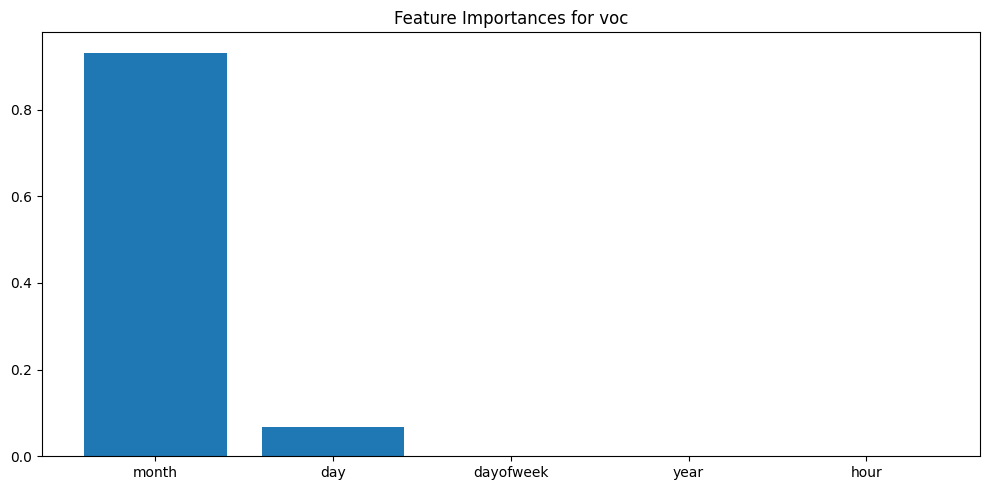

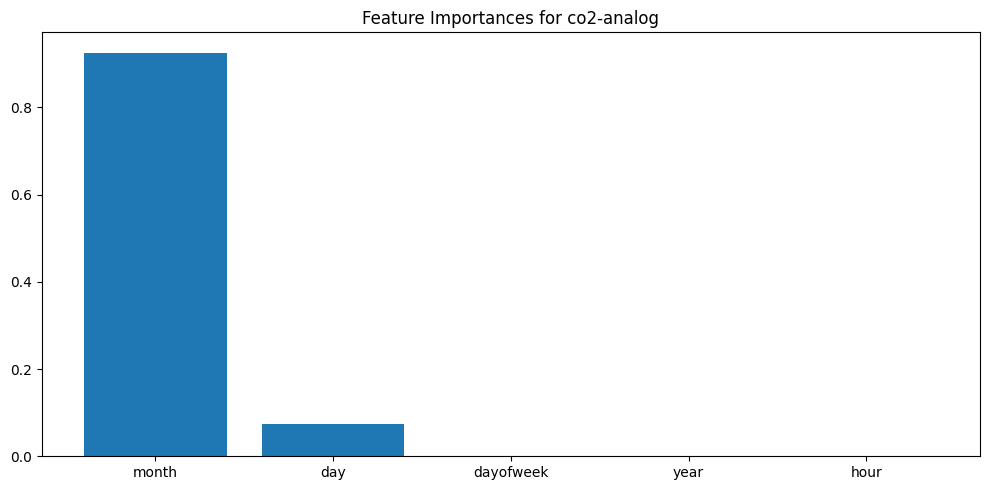

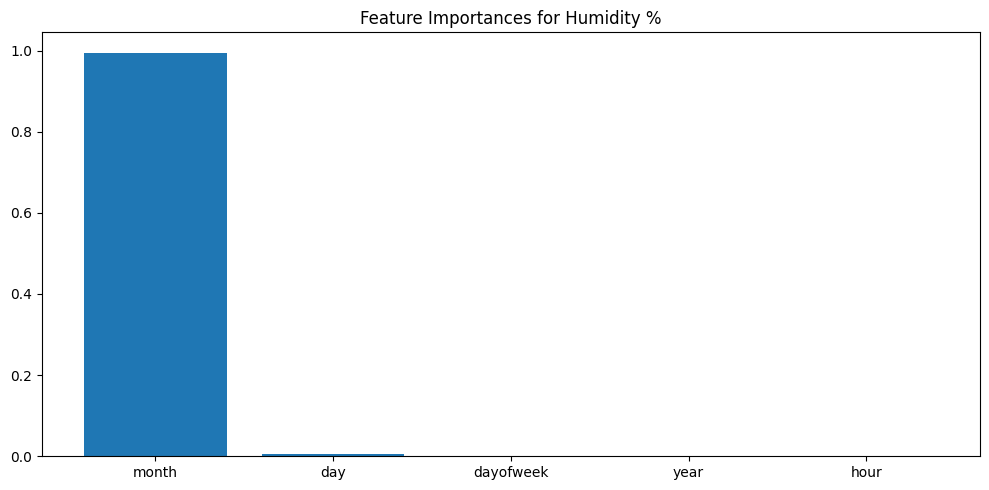

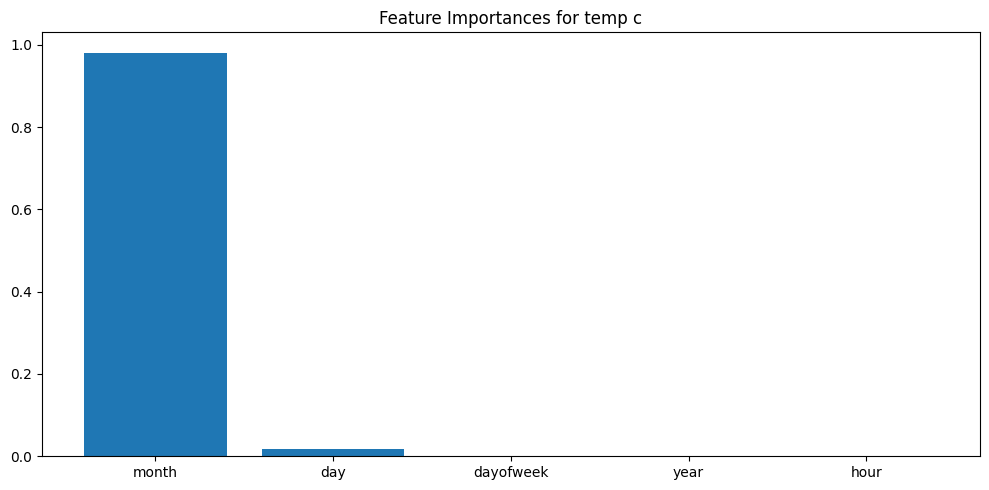

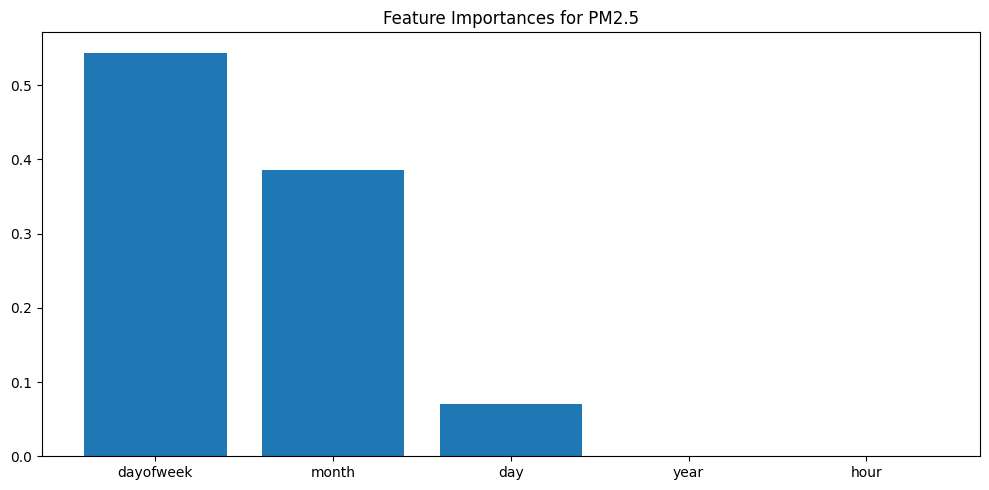

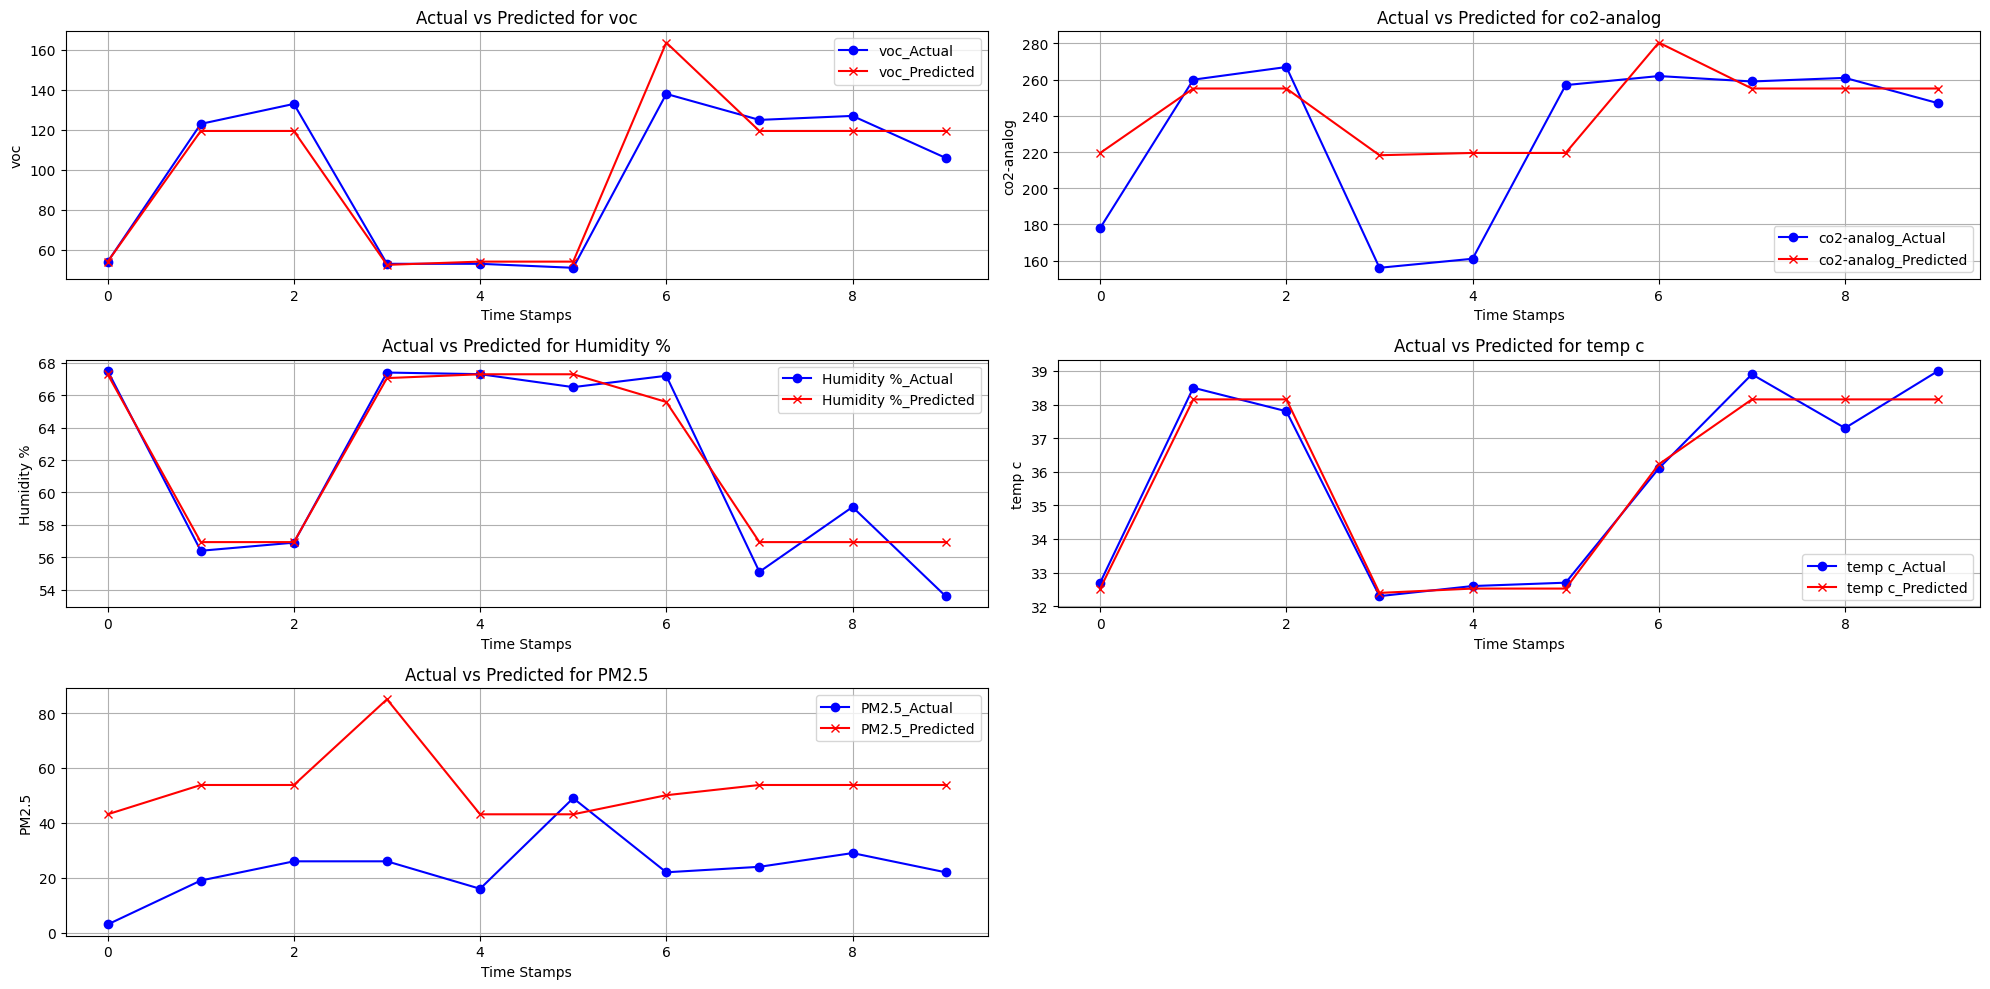

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("Updated.csv")

# Drop unnecessary column
if 'Unnamed: 2' in df.columns:
    df = df.drop(columns=['Unnamed: 2'])

if 'date' in df.columns:
    date_column = 'date'
elif 'DATE & TIME' in df.columns:
    date_column = 'DATE & TIME'
else:
    raise ValueError("Neither 'date' nor 'DATE & TIME' column found in DataFrame")
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Extract useful features from 'DATE & TIME'
df['hour'] = df[date_column].dt.hour
df['day'] = df[date_column].dt.day
df['month'] = df[date_column].dt.month
df['year'] = df[date_column].dt.year
df['dayofweek'] = df[date_column].dt.dayofweek

# Drop the original 'DATE & TIME' column
df = df.drop(columns=[date_column])

# Define feature columns and target columns
feature_cols = ['hour', 'day', 'month', 'year', 'dayofweek']
target_cols = ['voc', 'co2-analog', 'Humidity %', 'temp c', 'PM2.5']  # Replace 'Temp (F)' with the correct column name

# Extract features and targets
X = df[feature_cols]
y = df[target_cols]

# Convert target columns to numeric
for col in target_cols:
    y[col] = pd.to_numeric(y[col], errors='coerce')

X.fillna(method='ffill', inplace=True)  # Forward fill missing values in features
y.fillna(method='ffill', inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the MultiOutputRegressor with RandomForestRegressor
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Reduce the number of readings to 100
y_test = y_test.iloc[:10]
y_pred = y_pred[:10]

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R² Score:")
for col, value in zip(target_cols, r2):
    print(f"{col}: {value:.2f}")

print("\nMean Absolute Error (MAE):")
for col, value in zip(target_cols, mae):
    print(f"{col}: {value:.2f}")

print("\nMean Squared Error (MSE):")
for col, value in zip(target_cols, mse):
    print(f"{col}: {value:.2f}")

print("\nRoot Mean Squared Error (RMSE):")
for col, value in zip(target_cols, rmse):
    print(f"{col}: {value:.2f}")

# Binning for classification metrics
def binarize_values(y_true, y_pred, num_bins=10):
    bins = np.linspace(y_true.min().min(), y_true.max().max(), num_bins)
    y_true_binned = np.digitize(y_true, bins) - 1
    y_pred_binned = np.digitize(y_pred, bins) - 1
    return y_true_binned, y_pred_binned

y_test_binned, y_pred_binned = binarize_values(y_test, y_pred)

# Calculate accuracy and F1 score
accuracy = []
f1 = []
for i in range(len(target_cols)):
    acc = accuracy_score(y_test_binned[:, i], y_pred_binned[:, i])
    f1_sc = f1_score(y_test_binned[:, i], y_pred_binned[:, i], average='weighted')
    accuracy.append(acc)
    f1.append(f1_sc)

print("\nAccuracy:")
for col, value in zip(target_cols, accuracy):
    print(f"{col}: {value:.2f}")

print("\nF1 Score:")
for col, value in zip(target_cols, f1):
    print(f"{col}: {value:.2f}")

# Function to predict target values based on input features
def predict_target_values(hour, day, month, year, dayofweek):
    input_features = pd.DataFrame([[hour, day, month, year, dayofweek]], columns=feature_cols)
    input_features_scaled = scaler.transform(input_features)
    predicted_values = model.predict(input_features_scaled)
    return pd.DataFrame(predicted_values, columns=target_cols)

# Test predictions
test_inputs = [
    [12, 15, 6, 2024, 3],
    [6, 10, 1, 2023, 1],
    [18, 21, 7, 2024, 5],
    [23, 5, 12, 2025, 4]
]

for test_input in test_inputs:
    print(f"\nPrediction for input {test_input}:")
    print(predict_target_values(*test_input))

# Visualize feature importances for each target variable
for i, target in enumerate(target_cols):
    plt.figure(figsize=(10, 5))
    importances = model.estimators_[i].feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title(f'Feature Importances for {target}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [feature_cols[j] for j in indices])
    plt.tight_layout()
    plt.show()

# Plotting actual vs predicted values
plt.figure(figsize=(20, 10))
for i, col in enumerate(target_cols):
    plt.subplot(3, 2, i + 1)
    plt.plot(y_test[col].values, 'b-', label=f'{col}_Actual', marker='o')
    plt.plot(y_pred[:, i], 'r-', label=f'{col}_Predicted', marker='x')
    plt.title(f'Actual vs Predicted for {col}')
    plt.xlabel('Time Stamps')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

